## Random Forest
### 1. What is a Random Forest? 
A random forest is a classifying algorithm based on the principle of ensembling. In Other words it leverages multiple instances of Decision Trees at the same time to find the best result while avoiding the problem of overfitting, since decision trees are prone to it.

### 2. How it works?
- The idea behind is a random forest is the automated handling of creating more decision trees. Each tree receives a vote in terms of how to classify. Some of these votes will be wildly overfitted and inaccurate. However, by creating a hundred trees the classification returned by the most trees is very likely to be the most accurate.
- The image below shows five different decision trees being created. Each of these trees gets a vote and the classification with the most votes is the one that’s returned, although to keep in mind it's just an example, usually hundreds of trees are generated.
<center> <img src = "images/exm2-1.png" label = "Example 1" width= auto height= auto> </center>

#### But first let's load the data we want to work with
In order to explain it best, i'll be using a dummy dataset from sklearn and i'll be using the same data used in Decision Tree example

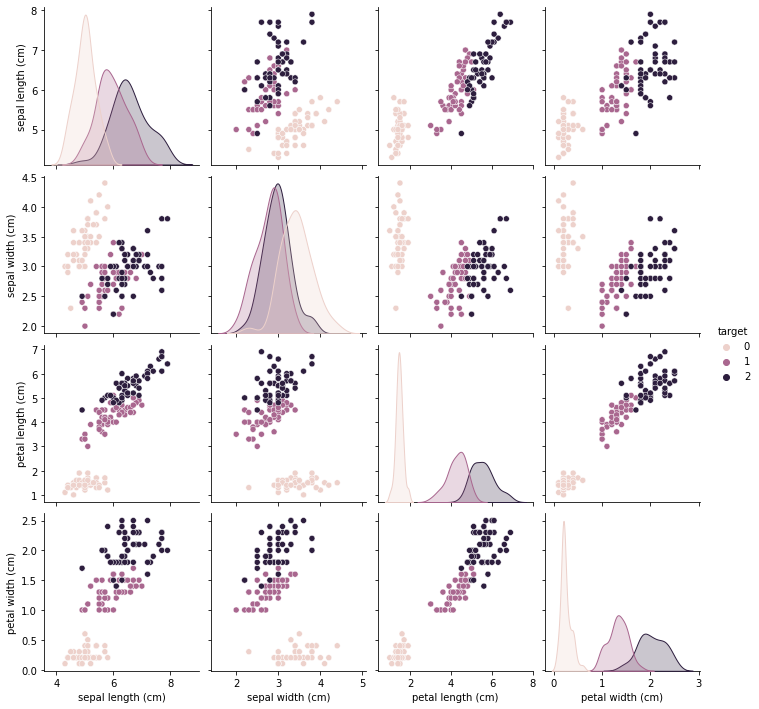

In [8]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score

################################################
import warnings
warnings.filterwarnings("ignore") #for suppressing the warnings
################################################

iris = load_iris() #loading the data

df = pd.concat([pd.DataFrame(list(iris.data), columns= iris.feature_names), pd.DataFrame(list(iris.target), columns= ["target"])], axis=1) #building a dataframe from the data so we could use for easier visualization

sns.pairplot(df, hue="target", size=2.5) #Visualizing the data to get a better understanding of its distrubtion and the weights of diffrent features

##### After we visualized our data and got a better understanding of what we're working with we can start by constructing the model


In [2]:
inp_df = df.drop(df.columns[[4]], axis=1) #the input for the model
out_df = df.drop(df.columns[[0,1,2,3]], axis=1) #output (the classes)

#for getting X and y we could've easily used X,y = load_iris(return_Xy = True) but since it's easier to visualize the data as a dataframe i just went with it.
X_train, X_test, y_train, y_test = train_test_split(inp_df, out_df, test_size=0.2, random_state=42) #80-20 training the testing ratio
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

#### Random Forest with the help of Sklearn:

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier()
clf = clf.fit(X_train,y_train)
pred = clf.predict(X_test)

acc = accuracy_score(y_test,pred)
print('Accuracy rate:', acc)

print('Number of trees generated:', len(clf.estimators_))

Accuracy rate: 1.0
Number of trees generated: 100


#### Visualizing some of those trees

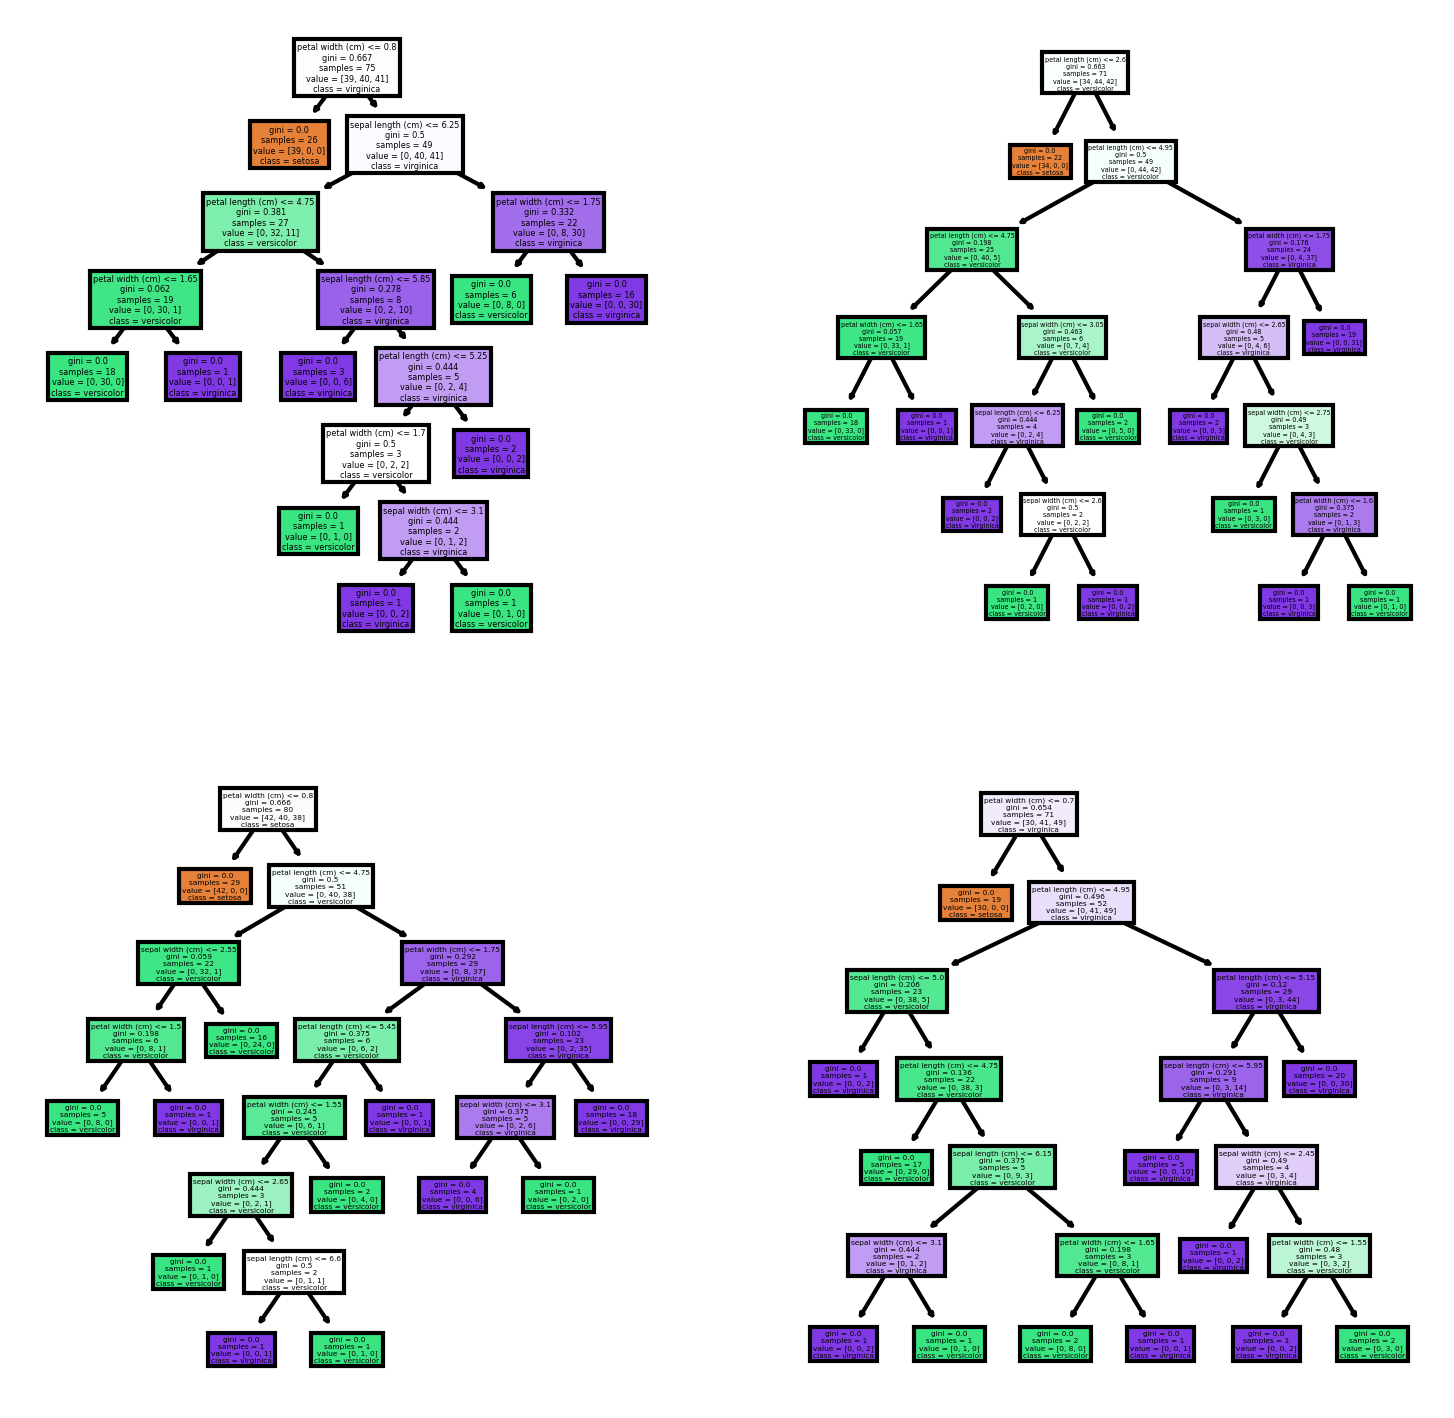

In [21]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fn= iris.feature_names
cn= iris.target_names

fig = plt.figure(figsize = (6,6), dpi=300)

plt.subplot(2, 2, 1)
plot_tree(clf.estimators_[0],
                feature_names = fn, 
                class_names=cn,
                filled = True);

plt.subplot(2, 2, 2)
plot_tree(clf.estimators_[24],
                feature_names = fn, 
                class_names=cn,
                filled = True);

plt.subplot(2, 2, 3)
plot_tree(clf.estimators_[49],
                feature_names = fn, 
                class_names=cn,
                filled = True);

plt.subplot(2, 2, 4)
plot_tree(clf.estimators_[99],
                feature_names = fn, 
                class_names=cn,
                filled = True);